<a href="https://colab.research.google.com/github/pallavrouth/MarketingAnalytics/blob/main/Predictive_modeling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Core Constructs in Statistical Learning

## Recap: Prediction vs Inference

Prediction involves using a statistical model to make forecasts or estimates about future or unseen data points. It is typically used when the goal is to make informed guesses or projections about what might happen. It is generally used to answer questions such as -

1. Can we predict a response given some predictors?
2. How can we accurately make a prediction of a response given some predictors?

Inference involves drawing conclusions or making inferences about a population or a process based on a sample of data. It is used to understand the associations between variables. Inference is typically used to test hypothesis testing related to these associations. It is used to answer questions such as -

1. Which predictors are associated with the response?
2. What is the nature relationship between the response and each predictor?

## Prediction Performance

Prediction is the ultimate goal of machine learning models. In simple words, the task for all **supervised ML** models to **generate outputs given a set of inputs**. For example, a bank wants to predict whether a customer will stay with the firm given his or her transaction history. One can build a machine learning model that will predict a customer's staying behavior (the output) given his or her transaction history (the inputs). At this point, it is important for an analyst to know whether the prediction model he made is accurate. Because the bank may decide to take (costly) measures to keep the customer.

Therefore, a fundamental task in the machine learning pipeline is to **evaluate the quality of the ML model**. One way to evaluate the quality is to check how well the model can perform on on **new or unseen data**. The better the performance the higher confidence of the analyst in using the model in the future.





### Evaluating Models - The ML workflow

Notice I say, in order to assess or evaluating the quality of an ML model, I need new or unseen data. This is data that will be generated in the future (say tomorrow). This raises an important question - **how does an analyst test the performance a machine learning model today if the unseen data will manifest tomorrow?**

The answer is that **we pretend** that certain fraction of the data **chosen randomly**, is new or unseen data. The basic logic is that because we are choosing this "pretend data" randomly from the current available dataset today, it is representative of the data that will be generated tomorrow. Therefore, given a dataset, the analysts task is to **divide it** randomly into **training** data and **testing data**. They are called so because the analyst can build a machine learning model on the training data and then evaluate how well the same model is doing on the test data.

But, exactly what steps encompass "building" and "evaluate" models? Building a model simply means **feeding** necessary set of input variables (or independent variables or features) and dependent variable (or the target variable) into a predictiive ML algorithm to create a predictive ML model. This step is also referred to as **fitting the model** or **training the model**. Remember we always use the training data to fit or train a model.

The ML algorithm is capable of learning how certain patterns in the inputs corresponds to a certain output in the training data. More importantly, this learning capability of predictive ML models means that **you can ask the model to generate predictions of the dependent variable given a new or unseen set of independent variables**. Specifically, you can use the input variables in the testing data to ask the model to create predictions of the dependent or target variable. Evaluating the quality of the model then involves using these predictions and **comparing them to the actual values** of dependent variable.


Going back to our example of predicting a customer's propensity to stay with the bank, how does this process of model building and evaluation on training and testing data work? We know that the analyst working for the bank uses the transaction history of customers till date as input variables or independent  (let's call the collection of these variables **X** for simplicity) and the customer's decision to stay or not as dependent or target variable (let's call this variable **Y** for simplicity) . Given this setup, the analyst splits the data (both **X** and **Y**) randomly into a training data and testing data. Therefore, the training data consists of **training X** and **training Y** from a random fraction of customers. And, the testing data consists of **testing X** and **testing Y** from the remaining random fraction of customers.

The analyst then builds an ML model of his or her choice using the **training X** and **training Y**. She then uses this trained ML model on her **testing X** to create predictions of **Y**. Recall, **Y** is the customer's decision to stay or not. Therefore, **testing Y** is actual data on customer's decision. Thus, by comparing the predictions to **testing Y**, the analyst is able to compare how well the predictions hold up against actual observations.

More formally, we can organize the analysts workflow into the following steps -

1. **Feature engineering** - This is when the analyst does her own research to figure out what set of input variables are relevant to the output. If needed she uses the data to create some measures. This step is crucial because the quality of the ML model depend on how relevant your independent variables are.

2. **Split the data** - **Randomly** divide the records in the dataset into a **training** set and a **testing** set.

3. **Picking a suitable model** - Next, the analyst choses an ML model that is suited for this task. Depending on the nature of the dependent or target variable, the analyst can pick from a plethora of classification versus regression type ML predictive models.

3. **Model building and assessment** - The analyst builds the model on the training set and then uses the same model to create predictions on the test set. The analyst can then compare these predictions to the actual output in the test set.

These series of steps is referred to as the **ML workflow**. Below we see step 1 and step 2 applied to a real world dataset where the task is to predict insurance claim of an individual given their characteristics.

In [ ]:
# step 1
import pandas as pd
insurance_data = (
    pd.read_csv('https://raw.githubusercontent.com/pallavrouth/MarketingAnalytics/main/datasets/insurance.csv')
      .drop(columns = ['index'])
      .dropna(subset = ['age','region'])
)

insurance_data.shape

(1332, 10)

In [ ]:
insurance_data.head()

In [ ]:
# step 2

# part 1: define your input and output
target = insurance_data.loc[:,'claim']
features = insurance_data.loc[:,['age','gender','bmi','bloodpressure','diabetic','children','smoker','region']]

In [ ]:
target

In [ ]:
features

In [ ]:
# part 2: Optional. Sometimes you may need to process them
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output = False)

num_feats = ['age', 'bmi', 'bloodpressure']
cat_feats = ['gender','diabetic','children', 'smoker', 'region']

final_pipe = ColumnTransformer([
   ('num', scaler, num_feats),
   ('cat', encoder, cat_feats)
])

In [ ]:
features_processed = final_pipe.fit_transform(features)
features_processed.shape

(1332, 19)

In [ ]:
# part 3: Split the data randomly into training and testing
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features_processed, target, test_size = 0.3, random_state = 42)

In [ ]:
print(features_train.shape)
print(features_test.shape)

(932, 19)
(400, 19)


# Supervised ML

There are two types of models - regression versus classification. In regression problems, the goal is to predict a continuous or numerical outcome. This outcome can take any real-number value within a certain range, making it a quantitative prediction. In classification problems, the goal is to assign input data points to predefined categories or classes. The outcome is a categorical variable, and predictions are made by assigning each data point to one of these classes.

## Regression Models

1. **Customer Lifetime Value (CLV) Prediction:** Predicting the future value of a customer over their entire relationship with a company. This can help businesses identify high-value customers, optimize marketing spend, and tailor their strategies to retain and acquire such customers.
2. **Sales Forecasting:** Predicting future sales or revenue based on historical sales data, marketing campaigns, seasonality, and other relevant factors. Accurate sales forecasts help in inventory management, resource allocation, and budget planning.
3. **Market Response Modeling:** Modeling the impact of marketing campaigns (e.g., advertising, promotions, email campaigns) on sales or customer acquisition. Understanding which marketing activities are most effective can help allocate resources more efficiently.
4. **Consumer Response Modeling:** Modeling the impact of marketing campaigns (e.g., advertising, promotions, email campaigns) on sales or customer acquisition. Understanding which marketing activities are most effective can help allocate resources more efficiently.


#### Linear Regression

In [ ]:
# step 3: picking a suitable model - linear regression in this case

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# step 4: building and evaluating the model
# part 1: build the model on training data
model = LinearRegression()
model.fit(features_train, target_train) # this is training data

# use the test data to make predictions
predicted_claim = model.predict(features_test) # this is test data

# Evaluation and Error

Recall I said that model assessment involves comparing model predictions to actual values of dependent variables in the test data. How do we compare exactly? Depending on the nature of dependent variable (categorical versus numerical), this involves using certain measures that capture **how far the predictions deviate from reality**. That is, we need to quantify the extent to which the predicted value of the dependent variable for a given observation is close to the true value of the dependent variable for that observation. These deviations are called **errors** in statistical terminology.

Going back to our example of predicting customer's decision to stay, let's say the ML model created by the analyst predicts this decision for every single customer in the testing data set. The analyst is able to compare whether the predicted decision is equal to the actual decision. An error is generated is the ML model incorrectly classifies the decision (also called missclassification). The analyst can judge the performance of the models by pooling together all the the missclassifications or the errors.





In [ ]:
# comparing actual versus predicted values of insurance claim
(
    pd.DataFrame({
        'actual_claim' : list(target_test),
        'predicted_claim' : list(predicted_claim)
    })
).head(n = 10)

In regression settings, assessment is by calculating the **mean square error**. It is computed by subtracting the actual output from the predicted output. The difference is an error. The error tells us how close the actual output is from the predicted. We want to choose the method that gives the MSE, as opposed to the lowest training MSE.

In [ ]:
# step 4: part 2: using a measure to evaluate the model
mse = mean_squared_error(target_test, predicted_claim)
Print("The MSE from a Linear Regression model is ",mse)

Now, we don't know if the overall error rate from the linear regression model (captured by the MSE value above) is any good. That is, we do not have anything to compare the error rate to.

This brings us to an important aspect of being an analyst. A good analyst will build several different types of predictive ML models for the same task. A good model will have smaller deviations or smaller overall error rate. A worse model will have larger deviations or larger overall error rate. All ML predictive model algorithms are designed to make the errors as low as possible - sometimes they succeed, sometimes they don't. The analyst will then pick the one which has the lowest possible overall error.







# Bias variance tradeoff

When selecting an appropriate model from different alternative, the analyst often has to think about a bias variance trade off.

- **Bias:** Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. A high bias model is overly simplistic and does not capture the underlying patterns in the data. This leads to **underfitting**, where the model is not flexible enough to represent the data accurately. In this case, the model consistently makes systematic errors, and it has a poor performance on both the training and test data.

- **Variance:** Variance refers to the error introduced by a model that is too complex and captures noise in the training data. A high-variance model is highly flexible and may **overfit** the training data, capturing random fluctuations and noise rather than the underlying patterns. Such a model may perform very well on the training data but poorly on new, unseen data.

The tradeoff can be summarized as follows:

1. **High Bias, Low Variance:** Models with high bias and low variance are simple and tend to underfit the data. They have a systematic error that is consistent across different datasets.

2. **Low Bias, High Variance:** Models with low bias and high variance are complex and tend to overfit the data. They are very flexible and can adapt to the noise in the training data, leading to poor generalization.

Ideally we want low variance and low bias. In our example of predicting insurance we need to check whether the MSE from linear regression can be improved by other suitable alternatives. Below we look at some alternatives models that uses **regularization** to prevent overfitting. Then we check if the MSE from these models are better (lower).

## Regression Models with Regularization

#### Lasso Regression

Lasso and Ridge regression are two popular techniques that uses regularization used to improve linear regression models by addressing issues related to overfitting.

Intuitively, regularization is a technique in machine learning helps prevent the problem of overfitting and improve the generalization of a model. It does so by adding a penalty or constraint to the model's optimization process, which influences the model's parameter estimates. This constraint encourages the model to avoid extreme or high values for the parameters or coefficients (which sometimes results in overfitting). By using this technique an analyst can identify which input variables were 'regularized' and can be subsequently dropped from the model.

In [ ]:
from sklearn.linear_model import Lasso

alpha = 0.5 # this is the regularization parameter
model = Lasso(alpha = alpha)
model.fit(features_train, target_train)

Lasso(alpha=0.5)

**Regularization and feature selection**

In [ ]:
coefficients = model.coef_
feature_names = list(features.columns)

feature_coefficients = [(feature_names[i], abs(coefficients[i])) for i in range(len(feature_names))]
feature_coefficients.sort(key = lambda x: x[1], reverse = True)
for feature, importance in feature_coefficients:
    print(f"Feature: {feature}, Importance: {importance}")

In [ ]:
# check MSE from Lasso model
predicted_claim = model.predict(features_test)
mse = mean_squared_error(target_test, predicted_claim)
Print("The MSE from a Lasso model is ",mse)

#### Ridge Regression

Ridge regression is similar to Lasso regression in the sense that both types of regression are both regularization techniques used in linear regression to address common issues like overfitting and multicollinearity. The key difference is how they penalize less important input variables - while lasso uses "L1" regularization parameter, ridge uses "L2".

In [ ]:
from sklearn.linear_model import Ridge

alpha = 0.5
model = Ridge(alpha = alpha)
model.fit(features_train, target_train)

In [ ]:
predicted_claim = model.predict(features_test)
mse = mean_squared_error(target_test, predicted_claim)
Print("The MSE from a Ridge model is ",mse)

Comparing the MSE from linear regression, ridge and lasso, we can see that it is least for. This means that the error rate from is lowest when it makes predictions. Therefore, it makes sense to pick this model for this particular prediction task.

# Within Model Evalution

So far, we have used MSE to help the analyst make an important assessment - how well a model is performing compared to other models that are different. Therefore, this is a type of **between** model assessment.

There is another type of assessment an analyst needs to consider - the **within** model assessment. This type of assessment involves picking the **best version of the same model**. This is often referred to as **model fine tuning**. In predictive ML, one can create different versions of a particular model by using the following tactics -

1. **By adjusting it's hyper paramters** -  Hyperparameters are model parameters that are not learned from the data but are set prior to training by the analyst. They play a critical role in controlling how the model learns about the trends in the data and therefore, influences how well the predictions are. Therefore, selecting the appropriate value of hyper parameter is an important decision.

  The best way to think about hyper parameters is to imagine you're driving a car, and the car's performance depends on several settings that you can adjust. These settings include the steering wheel's sensitivity, the pedal's responsiveness, the suspension's stiffness, and the engine's power. You can think of these settings as hyperparameters for your car.

  Not all models have hyper parameter. In the example above, the linear regression does not have any hyper parameter. Lasso and ridge has a hyper parameter - the regularization parameter `alpha` the. By changing the value of `alpha` an analyst can create different versions of lasso and ridge model.

2. **By adjusting the input variables** - The set of input or independent variables a model uses also influences how well it can learn to make predictions. A model with relevant input variables could have better predictions. Different models have different methods for guiding analysts to pick the best set of variables.

  In our example above, both lasso and ridge models allows analyst to pick the best set of variables by automatically reducing the impact of variables that not important. In other models, this is a more manual process (see variable importance in random forest for example).

Recall, when we were making **between model assessment** we were using a measure called MSE calculated with the help of the test data. This begs the question - should we carry out the **within model assessment** also on the test data ? The answer is no. For within model assessment **we rely on the training data**. Specifically, we re-split the training data into a smaller training data and a **validation data**.

The validation data serves the same purpose as the test data. That is, an analyst builds models with different hyper parameters (or different inputs or both) on the smaller training data and evaluates them on the validation data. We can use the same type of measure - that is, MSE - to determine which hyper parameter is best.

Instead of performing a simple split of the larger training data into into a smaller training data and a **validation data**, we will use something called the K-Fold Cross Validation.


## K fold Cross Validation

It involves dividing the dataset into K subsets (folds), training and testing the model K times, each time using a different fold as the test set and the remaining folds as the training set. Here's a step-by-step description of how K-fold CV is done:

1. **Data Splitting:** Start with a dataset containing your features (input data) and target variable (output data). The first step is to divide this dataset into K roughly equal-sized subsets, or "folds." The choice of K is determined by you; common values are 5 or 10.

2. **Training and Testing:** Perform K iterations, where each iteration represents one "fold." In each iteration, one of the K folds is used as the test set, while the other K-1 folds are used as the training set.

3. **Model Training:** Train your machine learning model on the training set for the current iteration. This includes selecting the algorithm, specifying hyperparameters, and fitting the model to the training data.

4. **Model Testing:** Use the trained model to make predictions on the test set for the current iteration. These predictions are used to evaluate the model's performance on unseen data.

5. **Performance Metric:** Calculate a performance metric (e.g., accuracy, precision, recall, F1 score, or any relevant metric for your problem) based on the model's predictions and the true values in the test set. This metric assesses how well the model is doing in the current iteration.

K fold Cross Validation can be better than a simple train test split. In K-fold CV each fold serves as the test set once. By averaging the results from multiple iterations, K-fold CV provides a more stable and less variable estimate of a model's performance compared to a single train-test split. Additionally, K fold CV can be useful when the dataset is small and there isn't enough samples to split into training and testing.

Let's use K fold Cross Validation on Lasso to determine the best value of `alpha`.

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold

alpha_values = [0.1, 0.5, 1, 10]

# I will do a 3 fold CV
kf = KFold(n_splits = 3, shuffle = True, random_state = 42)

alpha_mse = []
for alpha in alpha_values:
  model = model = Lasso(alpha = alpha)
  # perform the 3 fold CV on this model for this value of alpha
  mse_scores = cross_val_score(model, features_train, target_train, cv = kf, scoring = 'neg_mean_squared_error') # notice I have used the training data here
  mean_mse = - np.mean(mse_scores)
  alpha_mse.append(f"The MSE for alpha = {alpha} is {mean_mse}")

print(alpha_mse)

Based on the MSE values above, we can see that the alpha value of is most appropriate.

## Revised ML workflow

Lets revise the steps of our ML workflow taking into account within model assessment. The first three steps are the same.

1. **Feature engineering**

2. **Split the data**

3. **Picking a suitable model**

4. **Model fine tuning** - Use cross validation techniques on training data to tune the model. That is pick the best hyper parameter or the best set of input variables or both.

3. **Model building and assessment** - The analyst builds the **tuned model** on the training set and then uses the same model to create predictions on the test set. The analyst can then compare these predictions to the actual output in the test set.

In this example, we will use the best `alpha` value to re build the lasso model and check the performance on the test data.

In [ ]:
alpha = 0.5 # this is the regularization parameter that's best
model = Lasso(alpha = alpha)
model.fit(features_train, target_train)

predicted_claim = model.predict(features_test)
mse = mean_squared_error(target_test, predicted_claim)
Print("The MSE from a fine tuned Lasso model is ",mse)

## Other regression models: KNN Regression

K-Nearest Neighbors (KNN) regression is an algorithm that uses the concept of proximity to make predictions.

1. **Data Points as Neighbors:** In KNN regression, your dataset consists of data points, each with multiple features (independent variables) and a target value (the value you want to predict). The "neighbors" in KNN are other data points in your dataset.

2. **K and the Neighborhood:** The "K" in KNN represents the number of nearest neighbors you'll consider when making a prediction. For each data point, KNN finds the K nearest neighbors based on a distance metric, often Euclidean distance. These neighbors are the data points with the most similar feature values to the data point you're trying to predict.

3. **Proximity-Based Prediction:** To make a prediction for a new data point, KNN averages (for regression) or takes a majority vote (for classification) of the target values of its K nearest neighbors. In the case of regression, it calculates the mean (average) of the target values of these neighbors.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors = 3)
knn_model.fit(features_train, target_train)

## Classification Models

1. **Churn Prediction:** Identifying customers who are likely to churn (stop using a product or service) versus those who are likely to stay loyal. This allows companies to focus retention efforts on high-risk customers.

2. **Lead Scoring:** Classifying leads or prospects into categories like "hot leads," "warm leads," or "cold leads" based on their likelihood to convert into paying customers. This helps sales and marketing teams prioritize their efforts.

3. **Spam Detection:** Classifying incoming emails, comments, or social media posts as either spam or legitimate content. This ensures that spam content is filtered out, providing a better user experience.

4. **Sentiment Analysis:** Determining the sentiment (positive, negative, or neutral) of customer reviews, social media mentions, or other text data. This information helps gauge public perception and brand sentiment.

### Logistic Regression

In [ ]:
# step 1
churn_data = (
    pd.read_csv('https://raw.githubusercontent.com/pallavrouth/MarketingAnalytics/main/datasets/churn.csv')
      .drop(columns = ['RowNumber'])
)

churn_data.head()

In [ ]:
# step 2
# part 1: define your input and output
target = churn_data.loc[:,'Exited']
features = churn_data.loc[:,['CreditScore', 'Geography', 'Gender', 'Age',
                             'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                             'IsActiveMember', 'EstimatedSalary']]

# part 2: Optional. Sometimes you may need to process them
scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output = False)

num_feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_feats = ['Geography', 'Gender','HasCrCard','IsActiveMember']

final_pipe = ColumnTransformer([
   ('num', scaler, num_feats),
   ('cat', encoder, cat_feats)
])

features_processed = final_pipe.fit_transform(features)

# part 3: Split the data randomly into training and testing
features_train, features_test, target_train, target_test = train_test_split(features_processed, target, test_size = 0.3, random_state = 42)

In [ ]:
# step 3: picking a suitable model - logistic regression in this case
from sklearn.linear_model import LogisticRegression

# step 4: building and evaluating the model
# part 1: build the model on training data
model = LogisticRegression()
model.fit(features_train, target_train)

predicted_probability = model.predict_proba(features_test)

In [ ]:
predicted_probability

In [ ]:
predicted_label = model.predict(features_test)

In [ ]:
predicted_label

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
(
    pd.DataFrame({
        'actual_clickad' : list(target_test),
        'predicted_clickad' : list(predicted_label)
    })
).head(n = 20)

## Validation for Classification Models

A confusion matrix is a table used in machine learning and statistics to evaluate the performance of a classification algorithm. It is a valuable tool for assessing how well a model's predictions align with the actual class labels in a dataset. In a binary classification problem, where there are two possible classes (e.g., "positive" and "negative"), a confusion matrix typically consists of four values:

1. **True Positives (TP):** The number of instances that were correctly predicted as positive (correctly classified as the positive class).
2. **True Negatives (TN):** The number of instances that were correctly predicted as negative (correctly classified as the negative class).
3. **False Positives (FP):** The number of instances that were incorrectly predicted as positive when they were actually negative (a type I error).
4. **False Negatives (FN):** The number of instances that were incorrectly predicted as negative when they were actually positive (a type II error).

The confusion matrix helps you calculate the following measures:

1. **Accuracy:** (TP + TN) / (TP + TN + FP + FN), which measures the overall correctness of the classification.
2. **Precision:** TP / (TP + FP), which quantifies the ability of the model to avoid false positive errors.
3. **Recall** (Sensitivity or True Positive Rate): TP / (TP + FN), which measures the ability of the model to correctly identify positive instances.
4. **F1 Score**: A metric that combines precision and recall to balance both false positives and false negatives.

In this course, we will just focus on accuracy.

In [ ]:
# step 4: part 2: using a measure to evaluate the model
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(target_test, predicted_label)
pd.DataFrame(confusion_mat, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

,Predicted 0,Predicted 1
Actual 0,2318,98
Actual 1,468,116


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(target_test, predicted_label)
print("Accuracy of Logistic regression model is:", accuracy)

Accuracy: 0.8113333333333334
Precision: 0.5420560747663551
Recall: 0.19863013698630136
F1 Score: 0.2907268170426065
ROC AUC: 0.7734098589313254


### Support Vector Machines

SVMs are a type of Maximal Margin Classifier that uses a **hyperplane** to distinguish between two (or more classes).

In a two-dimensional space (2D), a hyperplane is essentially a straight line that separates two classes of data points. In a three-dimensional space (3D), it becomes a flat plane. In higher-dimensional spaces, it's a higher-dimensional flat surface. The critical point is that a hyperplane is a decision boundary that separates data points belonging to different classes.

The key idea behind the Maximal Margin Classifier is to find the hyperplane that maximizes the margin between the classes. The margin is the distance between the hyperplane and the nearest data points from each class. The data points that are closest to the hyperplane are called **"support vectors."** These are the critical data points that define the margin. The distance between the support vectors and the hyperplane should be maximized.

SVM has a regularization parameter that needs to be tuned.

In [ ]:
from sklearn.svm import SVC

C_values = [0.1, 1, 10]

best_model = None
best_mean_accuracy = 0

kf = KFold(n_splits = 3, shuffle = True, random_state = 42)

for C in C_values:
      # function for SVM
      model = SVC(C = C, kernel = 'rbf', probability = True)
      accuracy_scores = cross_val_score(model, features_train, target_train, cv = kf, scoring = 'accuracy')
      mean_accuracy = np.mean(accuracy_scores)

      if mean_accuracy > best_mean_accuracy:
          best_mean_accuracy = mean_accuracy
          best_model = model

# Print the best model's hyperparameters and mean accuracy
print("Best Model:")
pprint(best_model.get_params())
print("Best Mean Accuracy:", best_mean_accuracy)

In [ ]:
# use the best hyper parameter to build the best model
model = SVC(C = 1, kernel = 'rbf', probability = True)
model.fit(features_train, target_train)

predicted_label = model.predict(features_test)
confusion_mat = confusion_matrix(target_test, predicted_label)
print(pd.DataFrame(confusion_mat, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"]))

accuracy = accuracy_score(target_test, predicted_label)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

          Predicted 0  Predicted 1
Actual 0         2368           48
Actual 1          359          225
Accuracy: 0.8643333333333333
Precision: 0.8241758241758241
Recall: 0.3852739726027397
F1 Score: 0.5250875145857643
ROC AUC: 0.8289857712283407


## Decision Tree as Classifier





In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

target = churn_data.loc[:,'Exited']
features = churn_data.loc[:,['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

### Building a DT

In [ ]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(features_train, target_train)

### Visualizing a DT

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

feature_names = list(features.columns)

dot_data = export_graphviz(
    model,
    out_file = None,
    feature_names = feature_names,
    class_names = ["churn","active"],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

### Model tuning and prediction


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold

max_depth = [3,6,9,12]

best_model = None
best_mean_accuracy = 0

kf = KFold(n_splits = 3, shuffle = True, random_state = 42)

for depth in max_depth:
      model = DecisionTreeClassifier(max_depth = depth)
      accuracy_scores = cross_val_score(model, features_train, target_train, cv = kf, scoring = 'accuracy')
      mean_accuracy = np.mean(accuracy_scores)
      print("For depth =", depth, "mean accuracy is ", mean_accuracy)

      if mean_accuracy > best_mean_accuracy:
          best_mean_accuracy = mean_accuracy
          best_model = model

# Print the best model's hyperparameters and mean accuracy
print("Best Model:")
print(best_model)
print("Best Mean Accuracy:", best_mean_accuracy)

**Using the tuned model for prediction**

In [ ]:
from pprint import pprint

model = DecisionTreeClassifier(max_depth = 5)
model.fit(features_train, target_train)

predicted_label = model.predict(features_test)
confusion_mat = confusion_matrix(target_test, predicted_label)
pprint(pd.DataFrame(confusion_mat, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"]))

accuracy = accuracy_score(target_test, predicted_label)
print("Accuracy of a DT is:", accuracy)

## Decision Tree as Regressor


In [ ]:
target = insurance_data.loc[:,'claim']
features = insurance_data.loc[:,['age','bmi','bloodpressure','children']]

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

model = DecisionTreeRegressor(max_depth = 3, max_features = 3)
model.fit(features_train, target_train)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

feature_names = list(features.columns)

dot_data = export_graphviz(
    model,
    out_file = None,
    feature_names = feature_names,
    class_names = ["churn","active"],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

**Hyper-parameter tuning**



In [ ]:
target = insurance_data.loc[:,'claim']
features = insurance_data.loc[:,['age','gender','bmi','bloodpressure','diabetic','children','smoker','region']]

num_feats = ['age', 'bmi', 'bloodpressure']
cat_feats = ['gender','diabetic','children', 'smoker', 'region']

encoder = OneHotEncoder(sparse_output = False)

final_pipe = ColumnTransformer([
   ('num', 'passthrough', num_feats),
   ('cat', encoder, cat_feats)
])


final_pipe.fit(features)
features_processed = final_pipe.transform(features)
feature_names = final_pipe.get_feature_names_out()
feature_names

## Multiple Hyper parameter tuning: Grid Search

When a model has multiple hyper parameters to tune, we use a grid search technique to find the best set of hyper parameters.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

max_depth = [3,5,7,9,12]
max_feature = [3,5,7,9]

kf = KFold(n_splits = 3, shuffle = True, random_state = 42)

mean_mse_dfs = []
for depth in max_depth:
  for feature in max_feature:
      model = DecisionTreeRegressor(max_depth = depth, max_features = feature)
      mse_scores = cross_val_score(model, features_train, target_train, cv = kf, scoring = 'neg_mean_squared_error')
      mean_mse = - np.mean(mse_scores)
      mse_df = pd.DataFrame({'depth':[depth], 'max_feature':[feature], 'mean_mse': [mean_mse]})
      mean_mse_dfs.append(mse_df)


plot_data = (
    pd.concat(mean_mse_dfs)
      .assign(depth = lambda d: pd.Categorical(d.depth),
              max_feature = lambda d: pd.Categorical(d.max_feature))
)

In [ ]:
from plotnine import (
    ggplot,
    aes,
    geom_bar,
    coord_flip,
    geom_point,
    geom_line,
    geom_tile,
)

(
    ggplot(plot_data, aes(x = 'depth', y = 'max_feature', fill = 'mean_mse')) +
           geom_tile(color = "white")
)

In [ ]:
model = DecisionTreeRegressor(max_depth = 5, max_features = 7)
model.fit(features_train, target_train)

predicted_claim = model.predict(features_test)

mse = mean_squared_error(target_test, predicted_claim)
mse

## Random Forest



In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

target = insurance_data.loc[:,'claim']
features = insurance_data.loc[:,['age','gender','bmi','bloodpressure','diabetic','children','smoker','region']]

num_feats = ['age', 'bmi', 'bloodpressure']
cat_feats = ['children']
dummy_feats = ['gender','diabetic','smoker', 'region']

one_hot_encoder = OneHotEncoder(sparse_output = False)
ordinal_encoder = OrdinalEncoder()

final_pipe = ColumnTransformer([
   ('num', 'passthrough', num_feats),
   ('cat', ordinal_encoder, cat_feats),
   ('dummy', one_hot_encoder, dummy_feats)

])


final_pipe.fit(features)
features_processed = final_pipe.transform(features)
feature_names = final_pipe.get_feature_names_out()
feature_names_clean = [fname.replace('num__','').replace('cat__','').replace('dummy__','') for fname in feature_names]

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features_processed, target, test_size = 0.3, random_state = 42)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 250, max_features = 5)
model.fit(features_train, target_train)

predicted_claim = model.predict(features_test)
mse = mean_squared_error(target_test, predicted_claim)
mse

25435708.062197015

### Variable Importance

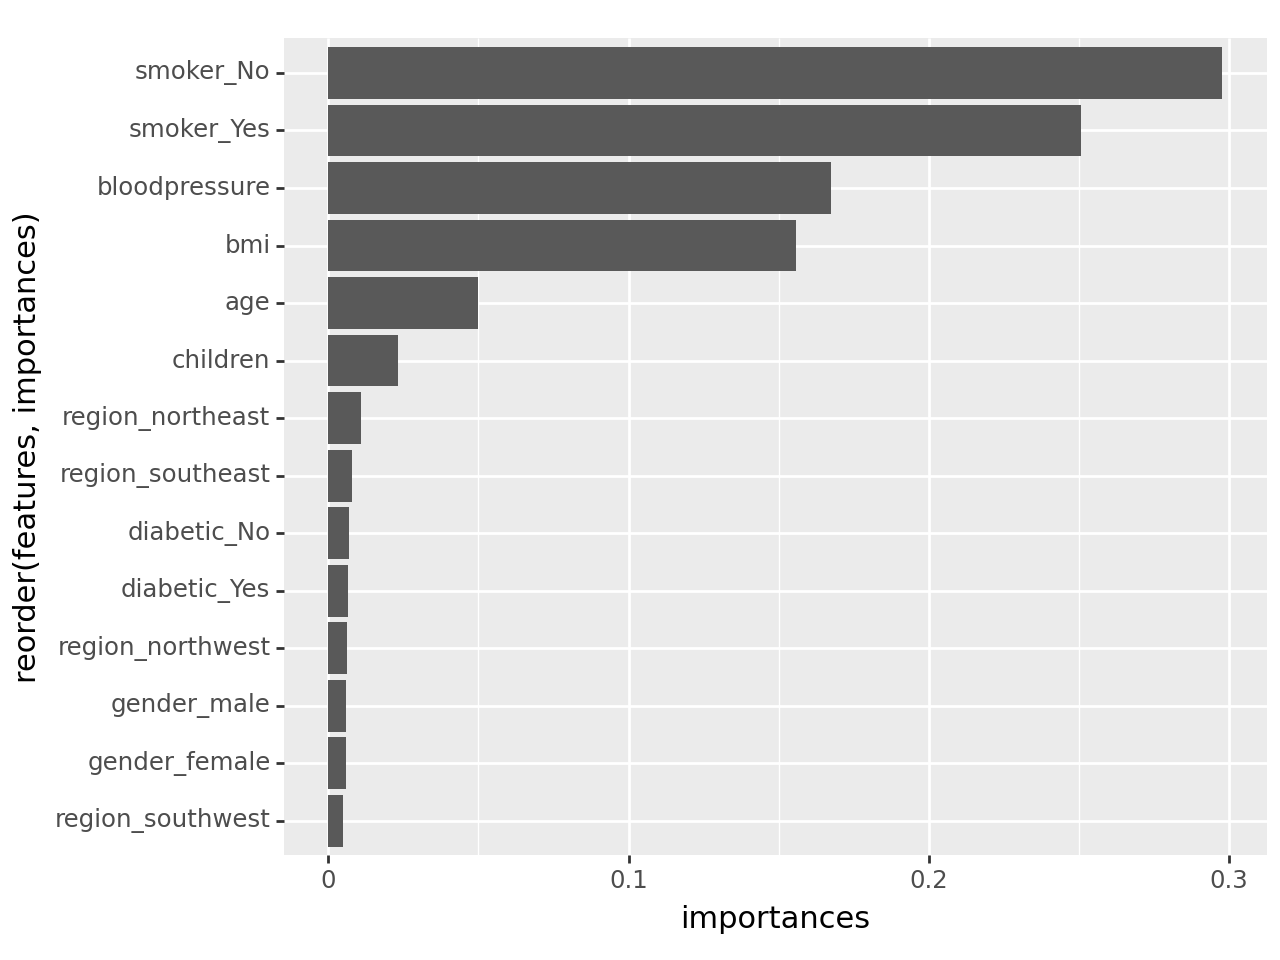

<Figure Size: (640 x 480)>

In [ ]:
plot_data = pd.DataFrame({'features': feature_names_clean,
                         'importances': model.feature_importances_})

(
    ggplot(plot_data, aes(x = 'reorder(features, importances)', y = 'importances')) +
      geom_bar(stat = 'identity') +
      coord_flip()
)

In [ ]:
target = insurance_data.loc[:,'claim']
features = insurance_data.loc[:,['age','gender','bmi','bloodpressure','diabetic','children','smoker','region']]

num_feats = ['age', 'bmi', 'bloodpressure']
cat_feats = ['children']
dummy_feats = ['smoker', 'region']

one_hot_encoder = OneHotEncoder(sparse_output = False)
ordinal_encoder = OrdinalEncoder()

final_pipe = ColumnTransformer([
   ('num', 'passthrough', num_feats),
   ('cat', ordinal_encoder, cat_feats),
   ('dummy', one_hot_encoder, dummy_feats)

])


final_pipe.fit(features)
features_processed = final_pipe.transform(features)
feature_names = final_pipe.get_feature_names_out()
feature_names_clean = [fname.replace('num__','').replace('cat__','').replace('dummy__','') for fname in feature_names]
feature_names_clean

In [ ]:
model = RandomForestRegressor(n_estimators = 250, max_features = 5)
model.fit(features_train, target_train)

predicted_claim = model.predict(features_test)
mse = mean_squared_error(target_test, predicted_claim)
mse

### Partial Dependence Plot

In [ ]:
from sklearn.inspection import partial_dependence

model = RandomForestRegressor(n_estimators = 250, max_features = 5)
model.fit(features_train, target_train)

In [ ]:
pdep = partial_dependence(model, features = [0], X = features_train)
pdep_df = pd.DataFrame({
                       'pdep': pdep['average'].tolist()[0],
                       'age': pdep['values'][0].tolist()
                        })

pdep_df

(
    ggplot(pdep_df, aes(x = 'age', y = 'pdep')) +
      geom_point() +
      geom_line()
)

In [ ]:
pdep = partial_dependence(model, features = [1], X = features_train)
pdep_df = pd.DataFrame({
                       'pdep': pdep['average'].tolist()[0],
                       'bmi': pdep['values'][0].tolist()
                        })

(
    ggplot(pdep_df, aes(x = 'bmi', y = 'pdep')) +
      geom_point() +
      geom_line()
)